# AI/ML with Python: Moview_Review Sentiment Analysis with Python



### Step 1: Introduction to NTLK

The code begins by importing necessary libraries, including NLTK for natural language processing tasks, scikit-learn functions like `train_test_split` for dataset splitting, `TfidfVectorizer` for feature extraction using TF-IDF, and `SVC` for Support Vector Machine classification. Additionally, metrics such as `accuracy_score`, `classification_report`, and `confusion_matrix` are imported to evaluate the performance of the classifier and finally import `matplotlib.pyplot as plt`: This line imports the `matplotlib.pyplot` module, which is a collection of functions for creating static, animated, and interactive visualizations in Python. The plt alias is a commonly used convention to make it easier to reference this module in the code then we import `seaborn as sns`: This line imports the seaborn library, which is built on top of Matplotlib and provides a high-level interface for creating attractive statistical graphics. Seaborn comes with several built-in themes and color palettes to enhance the aesthetics of the plots. The sns alias is a common convention used for Seaborn.

In [5]:
# Import necessary libraries (Data Acquisition)

import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Download the movie reviews dataset from NLTK

The next step involves downloading the movie reviews dataset from NLTK, specifically the `movie_reviews` corpus.

In [6]:
# Download the movie reviews dataset from NLTK

nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\91704\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

### Step 3: Load movie reviews dataset

Loads the movie reviews dataset into a list of documents. Each document is a tuple containing a list of words and the corresponding sentiment category (positive or negative).

In [7]:
# Load movie reviews dataset

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


### Step 4: Shuffle and Extract Features

This Shuffles the documents randomly for better training and then Combines the lists of words into sentences (text) for TF-IDF feature extraction

In [8]:
# Shuffle and Extract Features

import random
random.shuffle(documents)
documents_text = [' '.join(words) for words, category in documents]



### Step 5: Split Dataset into Training and Testing Sets

Splits the dataset into training and testing sets. `features_train` and `labels_train` are used for training, and `features_test` and `labels_test` are used for testing.

In [9]:
# Split Dataset into Training and Testing Sets (Data Processing and Cleaning)

features = documents_text
labels = [category for words, category in documents]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)


## Step 6: Text Preprocessing and Feature Extraction using TF-IDF

Here, `TfidfVectorizer` is used to convert the movie reviews into a TF-IDF matrix and then `max_features=3000` Limits the number of features to the top 3000 most frequent words then `stop_words='english'` Removes common English stop words.

In [10]:
# Text Preprocessing and Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
features_train_tfidf = tfidf_vectorizer.fit_transform(features_train)
features_test_tfidf = tfidf_vectorizer.transform(features_test)


### Step 7: Train a Support Vector Machine (SVM) classifier

Here the code utilizes a Support Vector Machine (SVM) classifier with a linear kernel, training the model with the TF-IDF features and labels from the training set.
Here, Code Initializes a Support Vector Machine classifier with a linear kernel then Fits (trains) the classifier using the TF-IDF features and corresponding labels from the training set.

In [11]:
# Train a Support Vector Machine (SVM) classifier (Sentiment Analysis Implementation)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(features_train_tfidf, labels_train)


SVC(kernel='linear')

### Step 8: Test the classifier

Here we Uses the trained classifier to make predictions on the testing set.

In [12]:
# Test the classifier

predictions = svm_classifier.predict(features_test_tfidf)


### Step 9: Evaluate the classifier

This code Evaluates the performance of the classifier using accuracy, confusion matrix, and classification report metrics.

In [13]:
# Evaluate the classifier

accuracy = accuracy_score(labels_test, predictions)
conf_matrix = confusion_matrix(labels_test, predictions)
class_report = classification_report(labels_test, predictions)


### Step 10: Visualize Accuracy

Here, `plt.figure(figsize=(8, 6))` Creates a new figure with a specified size (8 inches by 6 inches) and `sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")` Uses Seaborn to create a bar plot. The x-axis represents the label 'Accuracy,' and the y-axis represents the actual accuracy value. The color palette is set to "Blues." and `plt.title('Model Accuracy')` adds a title to the plot, indicating that it represents the model accuracy and `plt.ylim(0, 1)` Sets the y-axis limits to ensure that the accuracy values are within the range [0, 1] then at last `plt.show()` displays the plot.

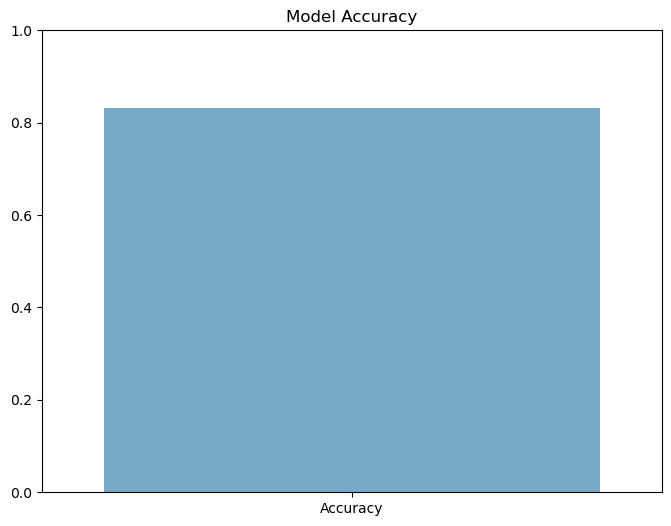

In [14]:
# Visualize Accuracy (Results Visualization [bar chart])

plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.show()


### Step 11: Visualize Confusion Matrix

here, `plt.figure(figsize=(8, 6))` Creates a new figure with a specified size (8 inches by 6 inches) and `sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])` Uses Seaborn to create a heatmap representing the confusion matrix. The conf_matrix is provided, and annotations (actual values) are displayed. The color map is set to "Blues," and axis labels are customized for better interpretation and `plt.title('Confusion Matrix')` adds a title to the plot, indicating that it represents the confusion matrix then `plt.xlabel('Predicted')` and `plt.ylabel('True')` adds labels to the x-axis and y-axis, indicating the predicted and true labels, respectively and then finally
`plt.show()` displays the plot.

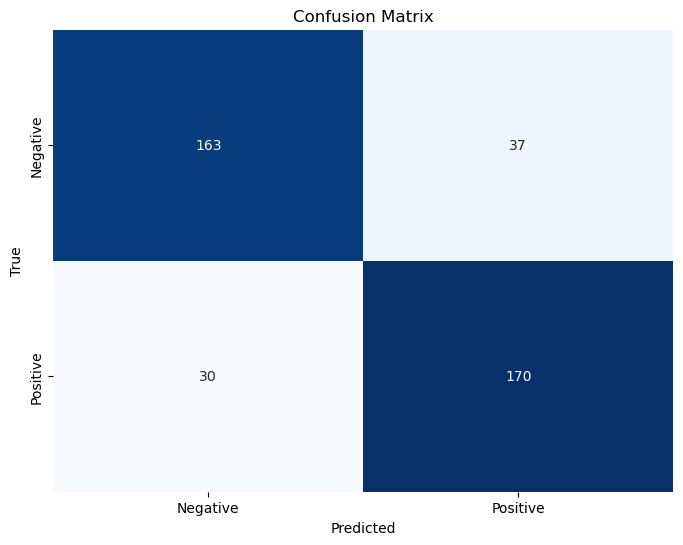

In [15]:
# Visualize Confusion Matrix(Results Visualization [heatmap])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Step 12: Display Classification Report

In this step the `print("Classification Report:\n", class_report)` Prints the classification report, which includes precision, recall, F1-score, and support for each class (negative and positive). The class_report variable contains this information.

In [16]:
# Display Classification Report(Results Visualization)

print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         neg       0.84      0.81      0.83       200
         pos       0.82      0.85      0.84       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



### Step 13: Detailed Explanation of My Project

I have chosen the movie review sentiment analysis project.This employs Python, leveraging libraries such as NLTK, scikit-learn, Matplotlib, and Seaborn to analyze and classify sentiments in movie reviews. The initial phase involves data acquisition, where the NLTK library is utilized to download a movie reviews dataset. Subsequently, the data is processed and cleaned, incorporating techniques like shuffling and splitting into training and testing sets. Text preprocessing involves the TF-IDF feature extraction method, converting reviews into numerical representations for machine learning analysis.

The core of the sentiment analysis is implemented using a Support Vector Machine (SVM) classifier, a robust choice for text classification tasks. The model is trained on the TF-IDF features derived from the training set. The project adheres to best practices in machine learning, employing metrics like accuracy, confusion matrix, and a classification report for evaluation.

For results visualization, Matplotlib and Seaborn are employed to create insightful visualizations. A bar chart represents the model accuracy, and a heatmap illustrates the confusion matrix, enhancing the interpretability of the sentiment analysis outcomes. This comprehensive approach, from data acquisition to visualization, encapsulates a thorough sentiment analysis project that can be extended or adapted for various domains.


Thank you,   
shubham